In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGES_PATH = 'data/images/'

In [151]:
image = io.imread('../' + IMAGES_PATH + 'barcode-00-02.jpg')

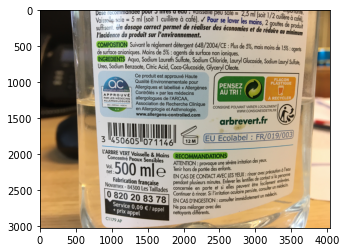

In [152]:
plt.imshow(image)

In [153]:
image = np.array(image).mean(axis=2).astype(np.uint8)

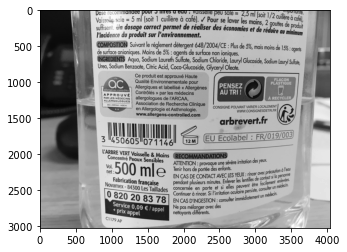

In [154]:
plt.imshow(image, cmap='gray')

In [155]:
tiles = []
n_cols = len(image[0])
n_rows = len(image)

for i in range(0, n_rows, 16):
    for j in range(0, n_cols, 16):
        tiles.append(image[i:i+16, j:j+16])

In [156]:
index_table = [(0, 2), (1, 2), (2, 2), (2, 1), (2, 0), (1, 0), (0, 0), (0, 1)]
padding_row = np.zeros(18).astype(np.uint8).tolist()

In [157]:
a = 0
b = 13
a = a | int(b > 12) << 1 # 1 sera remplace par i
a

2

In [158]:
def compute_lbp_value(lbp_window):
    lbp_value = 0
    pixel_value = lbp_window[1][1]
    for i in range(8):
        row_index, col_index = index_table[i]
        #print('index value', lbp_window[row_index, col_index])
        lbp_value = lbp_value | (int(lbp_window[row_index][col_index] >= pixel_value) << i)
        #print('lbp_value', lbp_value)
        
    return lbp_value

In [159]:
def pad_tile(tile):
    tileList = tile.tolist()
    
    for i in range(16):
        tileList[i].insert(0, 0)
        tileList[i].append(0)
    tileList.insert(0, padding_row)
    tileList.append(padding_row)    
    return np.array(tileList)

In [160]:
tileTest = pad_tile(tiles[0])

In [161]:
print(tileTest)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18 21 22 18 14 14 19 26 21 15 12 15 19 22 21 15  0]
 [ 0 15 16 17 17 15 13 16 21 16 14 16 17 16 18 19 17  0]
 [ 0 16 13 13 15 14 10 12 14 14 14 16 16 13 15 19 21  0]
 [ 0 22 19 16 16 15 15 18 18 20 16 14 13 11 14 18 20  0]
 [ 0 22 21 20 18 16 22 27 26 24 20 16 14 11 13 15 15  0]
 [ 0 14 15 17 14 11 17 23 19 18 17 18 18 14 14 17 17  0]
 [ 0 13 11 13 12  9 12 15 11 12 14 18 19 16 17 19 18  0]
 [ 0 19 14 15 17 14 17 19 17 14 14 17 18 17 17 18 16  0]
 [ 0 15 19 17 12 13 20 20 16 18 20 16 13 15 16 16 18  0]
 [ 0 15 19 18 13 11 15 19 21 21 22 18 14 15 16 16 17  0]
 [ 0 12 16 20 18 15 14 16 18 19 19 18 16 15 15 15 17  0]
 [ 0 16 17 18 18 17 17 15 13 15 18 22 21 18 15 15 16  0]
 [ 0 23 22 17 11 12 17 18 15 16 21 26 25 18 13 14 16  0]
 [ 0 24 23 17 10  9 15 18 17 15 17 22 21 15 12 14 17  0]
 [ 0 20 19 17 14 13 15 16 15 13 12 15 17 14 13 16 17  0]
 [ 0 18 15 14 16 16 15 13 13 16 13 16 20 19 18 18 16  0]
 [ 0  0  0  0  0  0  0  0  0  0

In [162]:
compute_lbp_value(tileTest)

2

In [163]:
compute_lbp_value(tileTest[0:3, 0:3])

2

In [164]:
tileTest[1,1]

18

In [165]:
histo_list = []

for tile in tiles:
    padded_tile = pad_tile(tile)
    lbp_histo = [0 for i in range(256)]
    
    for i in range(1, 17):
        for j in range(1, 17):
            window = padded_tile[i-1:i+2, j-1:j+2]
            lbp_histo[compute_lbp_value(window)] += 1    
            
    histo_list.append(lbp_histo / np.max(lbp_histo))
    
    

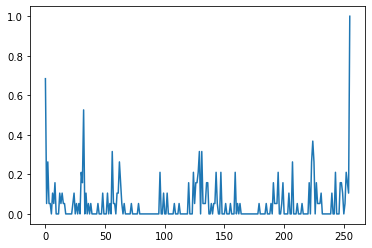

1.0


In [166]:
plt.plot(histo_list[0])
plt.show()
print(np.max(histo_list[0]))

In [167]:
from sklearn.cluster import KMeans

In [168]:
print(len(histo_list) / len(tiles))

1.0


In [169]:
histo = np.array(histo_list)

In [170]:
histo.shape

(47628, 256)

In [171]:
histo[1000]

array([0.30769231, 0.        , 0.11538462, 0.        , 0.        ,
       0.        , 0.        , 0.03846154, 0.11538462, 0.        ,
       0.03846154, 0.        , 0.03846154, 0.        , 0.07692308,
       0.11538462, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.07692308, 0.        ,
       0.15384615, 0.03846154, 0.15384615, 0.        , 0.11538462,
       0.03846154, 0.        , 0.        , 0.07692308, 0.        ,
       0.07692308, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03846154, 0.        , 0.07692308, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.34615385, 0.        , 0.07692308, 0.        ,
       0.15384615, 0.        , 0.19230769, 0.19230769, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [172]:
n_cluster=16

In [173]:
kmeans = KMeans(n_clusters=n_cluster, random_state=128).fit(histo)

In [174]:
transformed = kmeans.predict(histo)

In [175]:
print(transformed.shape)

(47628,)


In [176]:
transformed_reshape = transformed.reshape(image.shape[0] // 16, image.shape[1] // 16)

In [177]:
transformed_reshape.shape

(189, 252)

In [178]:
print(transformed_reshape)

[[ 6  6  6 ...  6  6  6]
 [ 6  6  6 ...  3  1  6]
 [ 6 13  6 ...  3  4  6]
 ...
 [ 6  6  6 ...  3  3  7]
 [ 1  1  1 ...  7  7  7]
 [ 6 12  6 ...  3  3  6]]


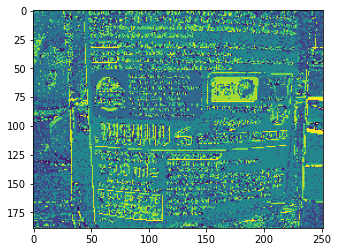

In [179]:
plt.imshow(transformed_reshape)

In [180]:
import matplotlib.cm as cm


In [181]:
def random_lut(n_values):
    '''Build a random LUT for `n_values` elements (sequential integers).'''
    samples = np.linspace(0, 1, n_values)  # take n_values values between 0 and 1 (evenly spaced)
    rng = np.random.default_rng(3)  # get a RNG with a specific seed
    samples = rng.permutation(samples)  # shuffle our values
    colors = cm.hsv(samples, alpha=None, bytes=True)  # get corresponding colors from the HSV color map
    return colors[...,:3]  # remove alpha channel and return

In [182]:
lut = random_lut(n_cluster)

In [183]:
recolored = lut[transformed_reshape]
recolored.shape

(189, 252, 3)

In [184]:
def show_image_seg(img, recolored, n_clusters):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title("Original image")
    plt.subplot(1,2,2)
    plt.imshow(recolored)
    plt.title(f"Segmented areas (with spatial info), {n_clusters} clusters")

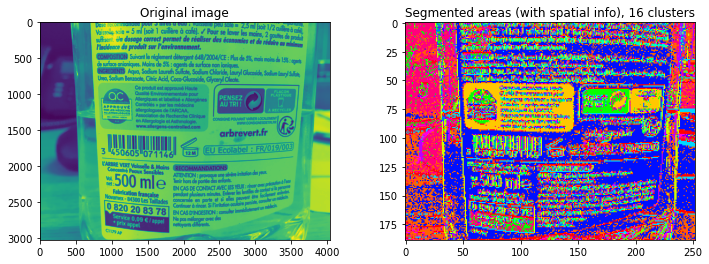

In [185]:
show_image_seg(image, recolored, n_cluster)

In [140]:
kmeans.cluster_centers_.shape

(16, 256)

In [141]:
transformed.shape

(47628,)

In [186]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=16, metric="euclidean")
neigh.fit(histo, transformed)


KNeighborsClassifier(metric='euclidean', n_neighbors=16)

In [187]:
neigh_prediction = neigh.predict(histo)

In [188]:
neigh_prediction.shape

(47628,)

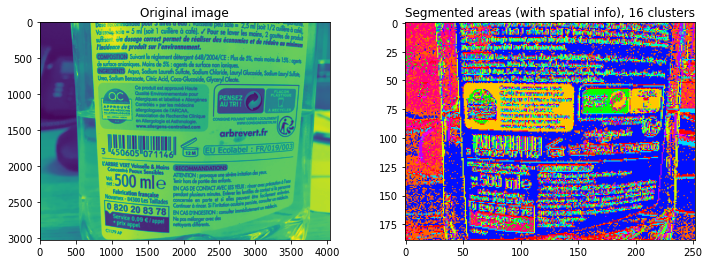

In [189]:
neighbor_recolored = lut[neigh_prediction.reshape(image.shape[0] // 16, image.shape[1] // 16)]


show_image_seg(image, neighbor_recolored, n_cluster)

In [146]:
from sklearn.neighbors import NearestCentroid
search_engine = NearestCentroid();
# Fit sur ton tableau d'histogramme
search_engine.fit(histo, transformed);
#distance, results = search_engine.kneighbors(histo, n_neighbors=16);

neighbor_prediction = search_engine.predict(histo)

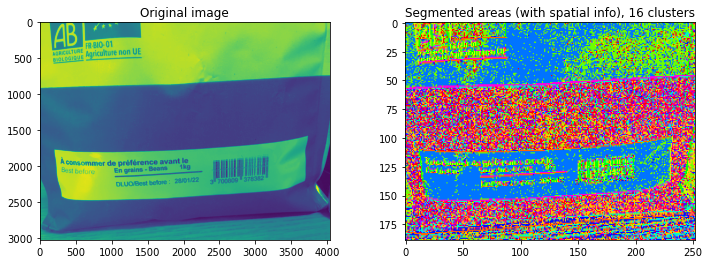

In [147]:
neighbor_recolored = lut[neighbor_prediction.reshape(image.shape[0] // 16, image.shape[1] // 16)]


show_image_seg(image, neighbor_recolored, n_cluster)

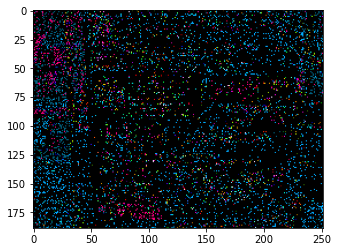

In [190]:
diff = neighbor_recolored - recolored
plt.imshow(diff, cmap='gray')

In [219]:
print(results.shape)

(47628, 16)


In [220]:
results

array([[    0, 30699, 10350, ..., 28237, 10232,  2650],
       [    1, 13442,   539, ..., 30119, 29539, 12112],
       [    2, 10586, 36965, ...,  2619,  2477, 10006],
       ...,
       [47625, 41200, 19471, ..., 21006, 43668, 24658],
       [47626, 43685, 42745, ..., 39052,  7072, 16257],
       [47627, 41743, 46795, ..., 25345,  1727, 46091]])

In [221]:
distance

array([[ 0.        ,  3.74165739,  4.        , ...,  6.32455532,
         6.32455532,  6.32455532],
       [ 0.        ,  7.07106781,  7.34846923, ...,  8.24621125,
         8.24621125,  8.36660027],
       [ 0.        ,  8.24621125,  8.94427191, ..., 11.3137085 ,
        11.40175425, 11.48912529],
       ...,
       [ 0.        ,  3.74165739,  4.        , ...,  5.47722558,
         5.47722558,  5.47722558],
       [ 0.        ,  5.83095189,  6.63324958, ...,  9.59166305,
         9.59166305,  9.69535971],
       [ 0.        ,  3.74165739,  4.        , ...,  5.47722558,
         5.47722558,  5.65685425]])

In [192]:
from sklearn.neighbors import NearestNeighbors
search_engine = NearestNeighbors();
# Fit sur ton tableau d'histogramme
search_engine.fit(histo);
distance, results = search_engine.kneighbors(histo, n_neighbors=16);

In [195]:
distance.shape, results.shape, histo.shape

((47628, 16), (47628, 16), (47628, 256))

In [197]:
print(distance[0])
print(results[0])

[0.         0.84037652 0.84247828 0.84599431 0.85038533 0.85082172
 0.85403738 0.85640972 0.86182862 0.8662475  0.86761192 0.8676177
 0.87406532 0.87423772 0.87639734 0.87714912]
[    0 16648  6051 12617   515 45459 17411 17390  4555  1268 32021  3044
  2274 17645  5810   763]


In [198]:
histo[16648]

array([0.55, 0.05, 0.25, 0.2 , 0.  , 0.  , 0.05, 0.15, 0.15, 0.  , 0.05,
       0.05, 0.05, 0.  , 0.25, 0.15, 0.05, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.05, 0.  , 0.2 , 0.  , 0.  , 0.05, 0.1 , 0.  , 0.25, 0.2 , 0.35,
       0.  , 0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.15, 0.05, 0.  , 0.1 , 0.  , 0.  , 0.  ,
       0.  , 0.3 , 0.  , 0.1 , 0.  , 0.05, 0.  , 0.15, 0.2 , 0.  , 0.  ,
       0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.  ,
       0.1 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.05, 0.05, 0.05, 0.05, 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.15,
       0.  , 0.  , 0.  , 0.1 , 0.  , 0.2 , 0.05, 0.3 , 0.15, 0.  , 0.3 ,
       0.  , 0.  , 0.  , 0.1 , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.05,
       0.3 , 0.  , 0.  , 0.  , 0.15, 0.  , 0.  , 0.

In [199]:
histo[0]

array([0.68421053, 0.05263158, 0.26315789, 0.05263158, 0.05263158,
       0.        , 0.10526316, 0.05263158, 0.15789474, 0.        ,
       0.        , 0.        , 0.10526316, 0.05263158, 0.10526316,
       0.05263158, 0.05263158, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.05263158, 0.10526316,
       0.        , 0.05263158, 0.        , 0.05263158, 0.        ,
       0.21052632, 0.15789474, 0.52631579, 0.        , 0.10526316,
       0.        , 0.05263158, 0.        , 0.05263158, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05263158,
       0.        , 0.        , 0.        , 0.10526316, 0.        ,
       0.        , 0.        , 0.10526316, 0.        , 0.05263158,
       0.        , 0.31578947, 0.05263158, 0.05263158, 0.        ,
       0.10526316, 0.10526316, 0.26315789, 0.15789474, 0.05263158,
       0.        , 0.05263158, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05263158, 0.        , 0.     

In [201]:
kmeans.cluster_centers_.shape

(16, 256)

In [202]:
from sklearn_extra.cluster import KMedoids

ModuleNotFoundError: No module named 'sklearn_extra'